In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('D:/DBMS/project/project/datascience/data.xlsx')

In [4]:
df

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39
...,...,...,...,...,...,...,...
377714,2020-08-07 11:55:00,899.42,919.79,-224.07,-209.77,901.01,-175.15
377715,2020-08-07 12:00:00,879.9,895.02,-228.04,-211.28,878.08,-176.94
377716,2020-08-07 12:05:00,887.2,895.7,-230.11,-214.65,885.32,-179.18
377717,2020-08-07 12:10:00,908.5,916.33,-231.51,-218.09,906.2,-181.96


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    377719 non-null  object        
 2   Cyclone_Material_Temp     377719 non-null  object        
 3   Cyclone_Outlet_Gas_draft  377719 non-null  object        
 4   Cyclone_cone_draft        377719 non-null  object        
 5   Cyclone_Gas_Outlet_Temp   377719 non-null  object        
 6   Cyclone_Inlet_Draft       377719 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 20.2+ MB


In [6]:
# checking for the missing values

df.isna().sum()

time                        0
Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          0
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         0
dtype: int64

There are no missing vales but columns have datatype as object when they should be floats, looking at these columns.

In [7]:
# function to check if a string can be converted to float

def isfloat(x):
    try:
        float(x)
        return True
    except:
        return False
        

In [8]:

cols = [col for col in df.columns if col != 'time']
for col in cols:
    x = df[col].astype(str)
    print(x[[not isfloat(k) for k in x ]].value_counts())

Cyclone_Inlet_Gas_Temp
Not Connect     723
I/O Timeout     470
Configure       108
Scan Timeout     17
Comm Fail         2
Name: count, dtype: int64
Cyclone_Material_Temp
Not Connect     723
I/O Timeout     470
Unit Down       271
Configure       108
Scan Timeout     17
Comm Fail         2
Name: count, dtype: int64
Cyclone_Outlet_Gas_draft
Not Connect     723
I/O Timeout     470
Configure       108
Scan Timeout     17
Comm Fail         2
Unit Down         1
Name: count, dtype: int64
Cyclone_cone_draft
Not Connect     723
I/O Timeout     470
Configure       108
Scan Timeout     17
Comm Fail         2
Name: count, dtype: int64
Cyclone_Gas_Outlet_Temp
Not Connect     723
I/O Timeout     470
Configure       108
Scan Timeout     17
Comm Fail         2
Unit Down         1
Name: count, dtype: int64
Cyclone_Inlet_Draft
Not Connect     723
I/O Timeout     470
Configure       108
Scan Timeout     17
Unit Down         2
Comm Fail         2
Name: count, dtype: int64


In [9]:
# replacing all the string values that are not number with nan

for col in cols:
    x = df[col].astype(str)
    df[col][[not isfloat(k) for k in x ]] = np.nan


In [10]:
# correcting the data types of columns

cols = [col for col in df.columns if col != 'time']
df[cols] = df[cols].astype('float64')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    376399 non-null  float64       
 2   Cyclone_Material_Temp     376128 non-null  float64       
 3   Cyclone_Outlet_Gas_draft  376398 non-null  float64       
 4   Cyclone_cone_draft        376399 non-null  float64       
 5   Cyclone_Gas_Outlet_Temp   376398 non-null  float64       
 6   Cyclone_Inlet_Draft       376397 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 20.2 MB


In [12]:
# calculate the missing percent

total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).round(2).sort_values(ascending = False)
pd.concat([total,percent],axis=1,keys=['Total Missing','Percent Missing'])

,Total Missing,Percent Missing
Cyclone_Material_Temp,1591,0.42
Cyclone_Inlet_Draft,1322,0.35
Cyclone_Outlet_Gas_draft,1321,0.35
Cyclone_Gas_Outlet_Temp,1321,0.35
Cyclone_Inlet_Gas_Temp,1320,0.35
Cyclone_cone_draft,1320,0.35
time,0,0.00


There are less than one percent missing values in every columns and most of them belong to the same records , so we can drop them.

In [13]:
# dropping row with missing values

df.dropna(axis = 0 , inplace=True)

In [14]:
df.shape

(376124, 7)

In [15]:
df.select_dtypes(include= 'float64').describe().T

,count,mean,std,min,25%,50%,75%,max
Cyclone_Inlet_Gas_Temp,376124.0,727.387946,328.634044,0.00,856.28,882.38,901.12,1157.63
Cyclone_Material_Temp,376124.0,750.828429,350.922335,-185.00,867.66,913.36,943.66,1375.00
Cyclone_Outlet_Gas_draft,376124.0,-177.830733,99.138694,-456.66,-247.19,-215.26,-170.15,40.27
Cyclone_cone_draft,376124.0,-164.582678,90.096403,-459.31,-226.77,-198.57,-143.68,488.86
Cyclone_Gas_Outlet_Temp,376124.0,715.798475,325.316433,13.79,802.04,871.53,899.30,1375.00
Cyclone_Inlet_Draft,376124.0,-141.309826,77.609444,-396.37,-193.51,-169.46,-136.31,41.64


 # Ploting distplot for visually identifying outlier as well as distribution of data

In [16]:


#Function for visualizing distribution of numerical variables, box plot
def dist_plot(x):
    ax = sns.distplot(x = df[x], color = 'midnightblue')
    ax.set_title('{} distribution'.format(x), fontsize = 16, pad = 5)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)
     



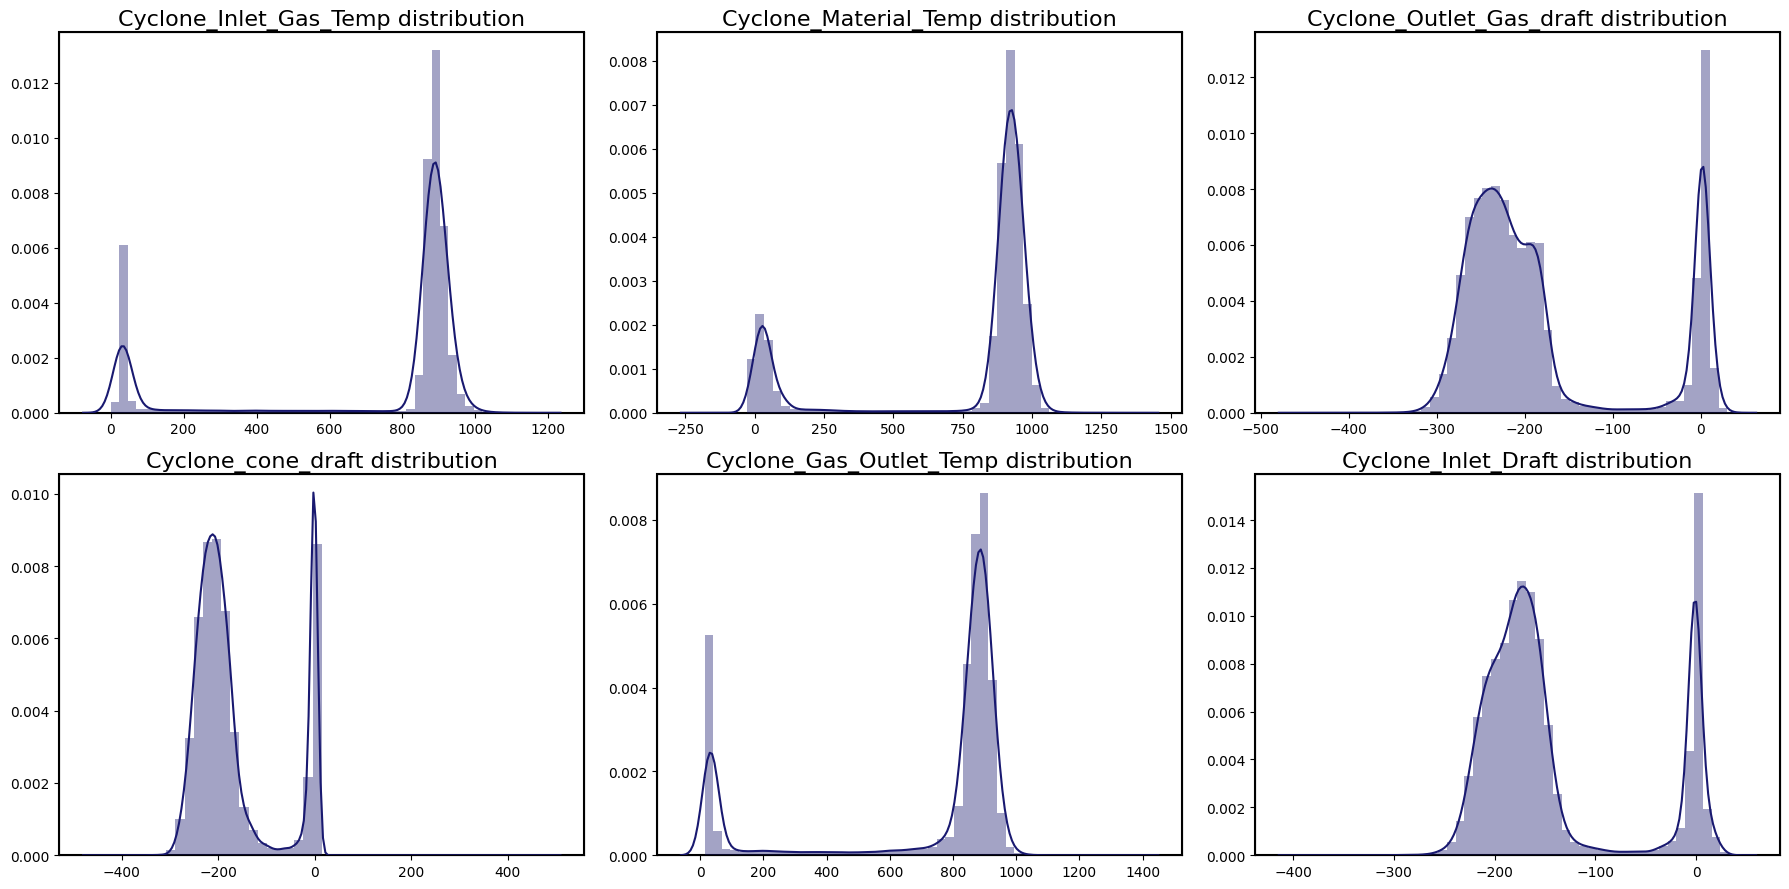

In [17]:
plt.figure(figsize = [18,9])
for i in range(len(cols)):
    plt.subplot(2,3,i+1)
    dist_plot(cols[i])
    plt.ylabel('')
    #plt.yticks([])
plt.tight_layout()
plt.show()

# HeatMap for identifying patterns

<Axes: >

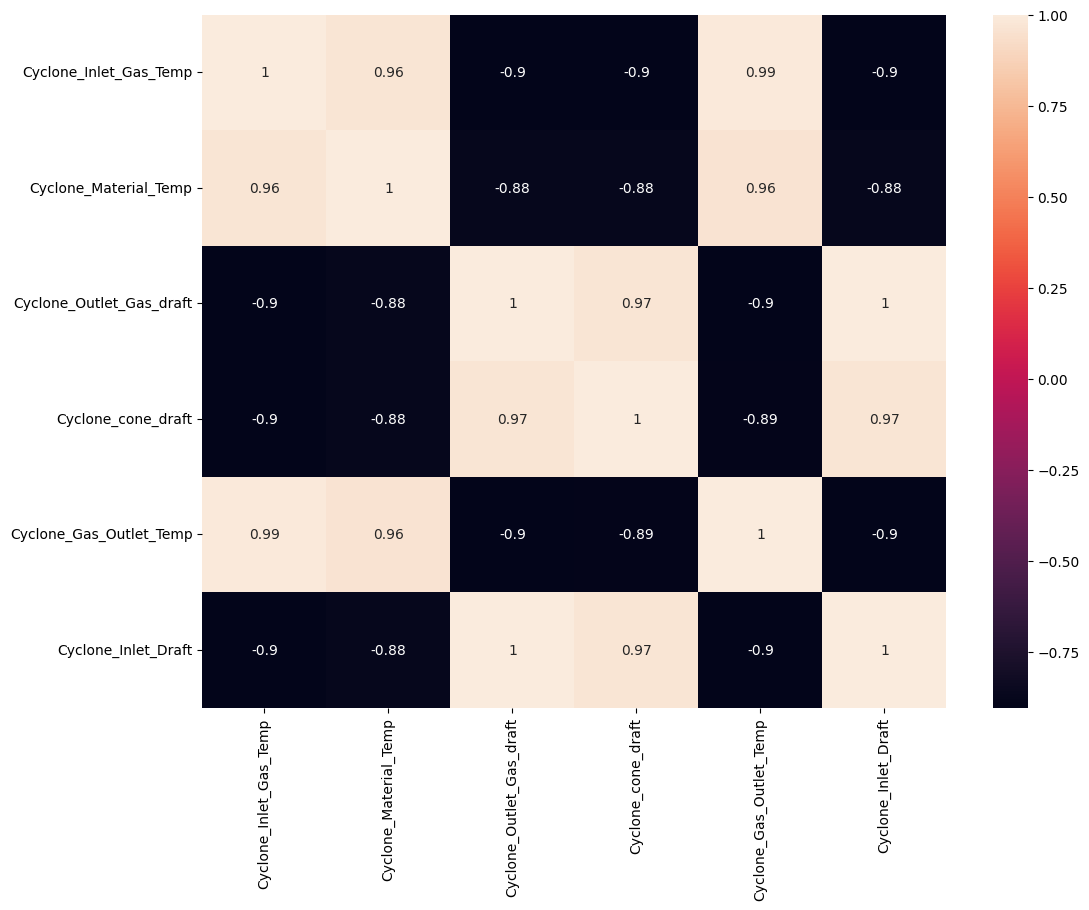

In [18]:
plt.figure(figsize = [12, 9])
sns.heatmap(df.select_dtypes(include= 'float64').corr(), annot = True)

# Pairplot for see pairwise relationships among multiple variables

<Figure size 1200x900 with 0 Axes>

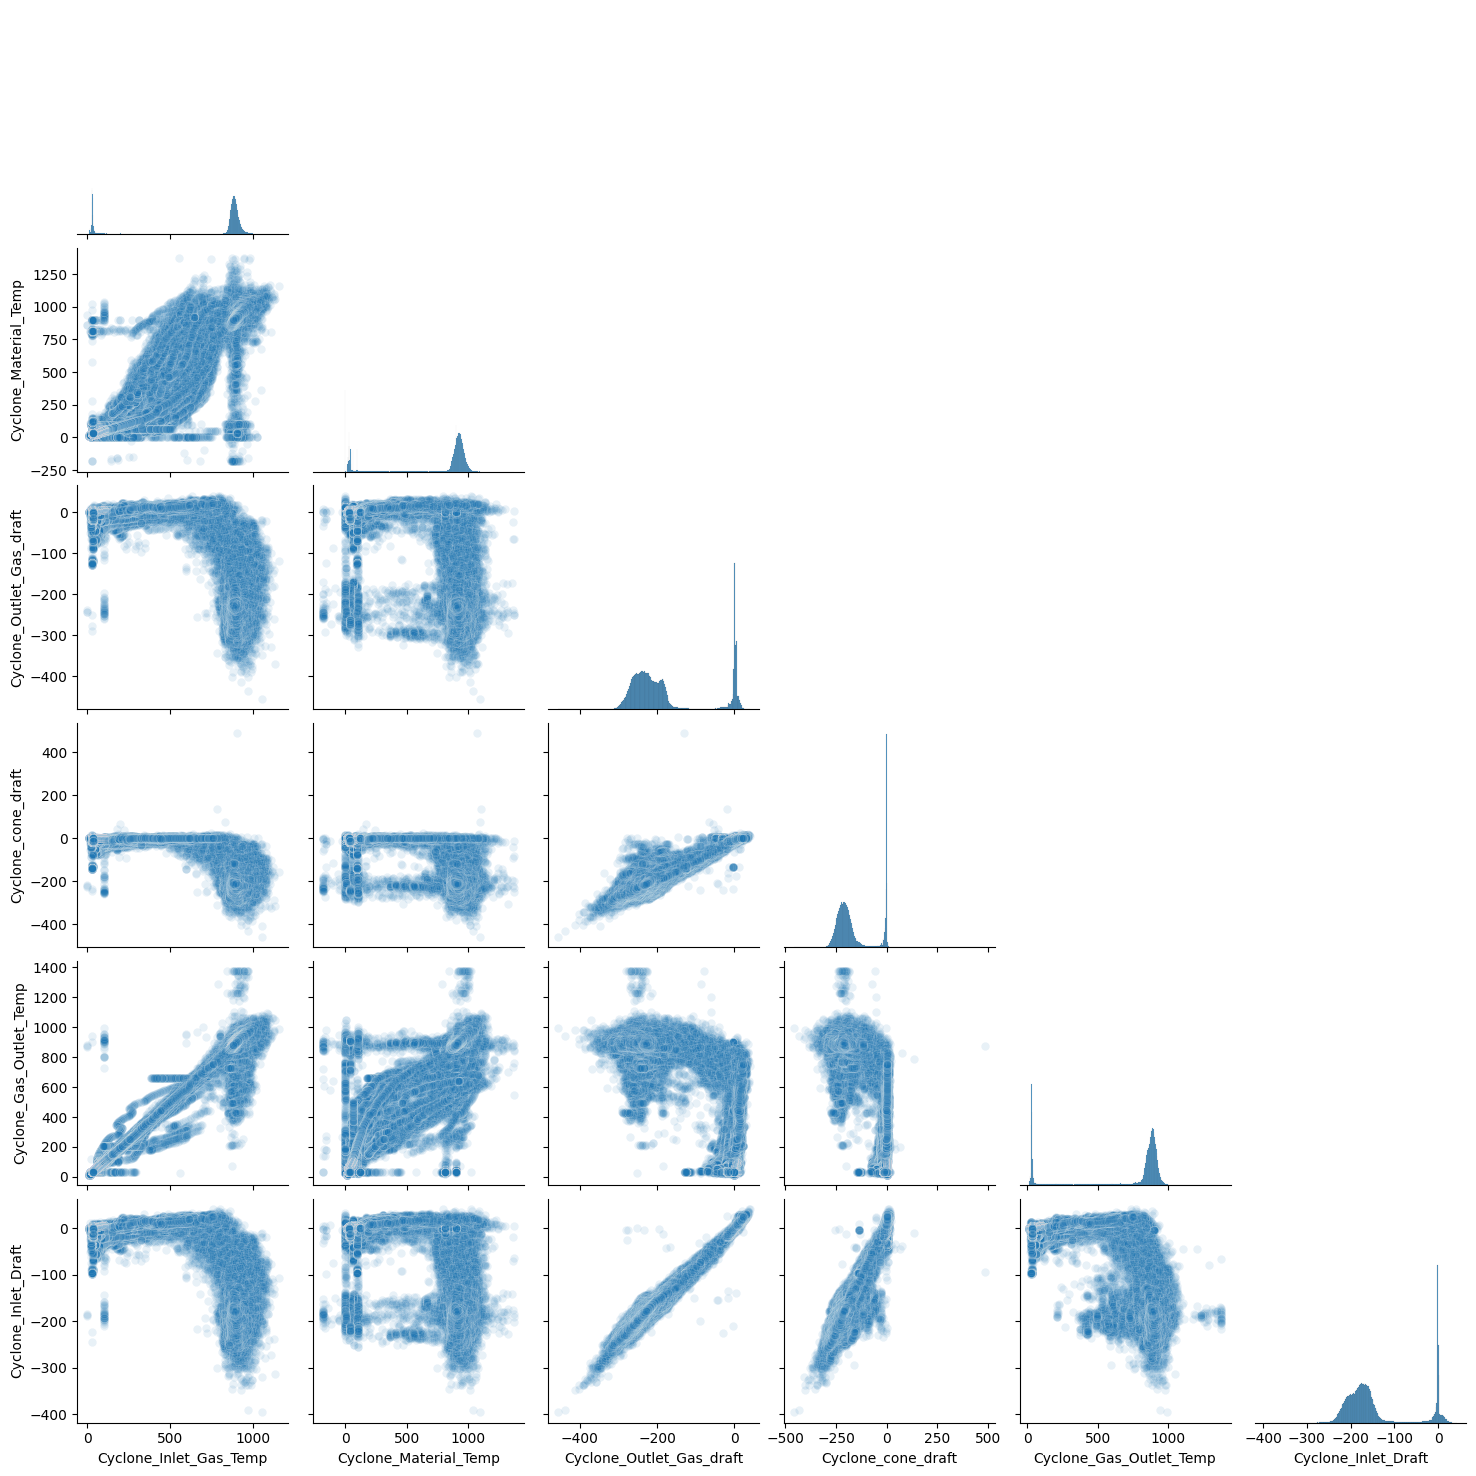

In [19]:
plt.figure(figsize = [12, 9])
sns.pairplot(df, plot_kws={'alpha':0.1}, corner = True)

# Plotting boxplot for each feature for visualizingsummary about data like mean as well as outlier

In [20]:

# Define the box_plot function to visualize a single variable
def box_plot(x):
    ax = plt.subplot(3, 3, i + 1)  
    plt.boxplot(df[x], vert=False)  


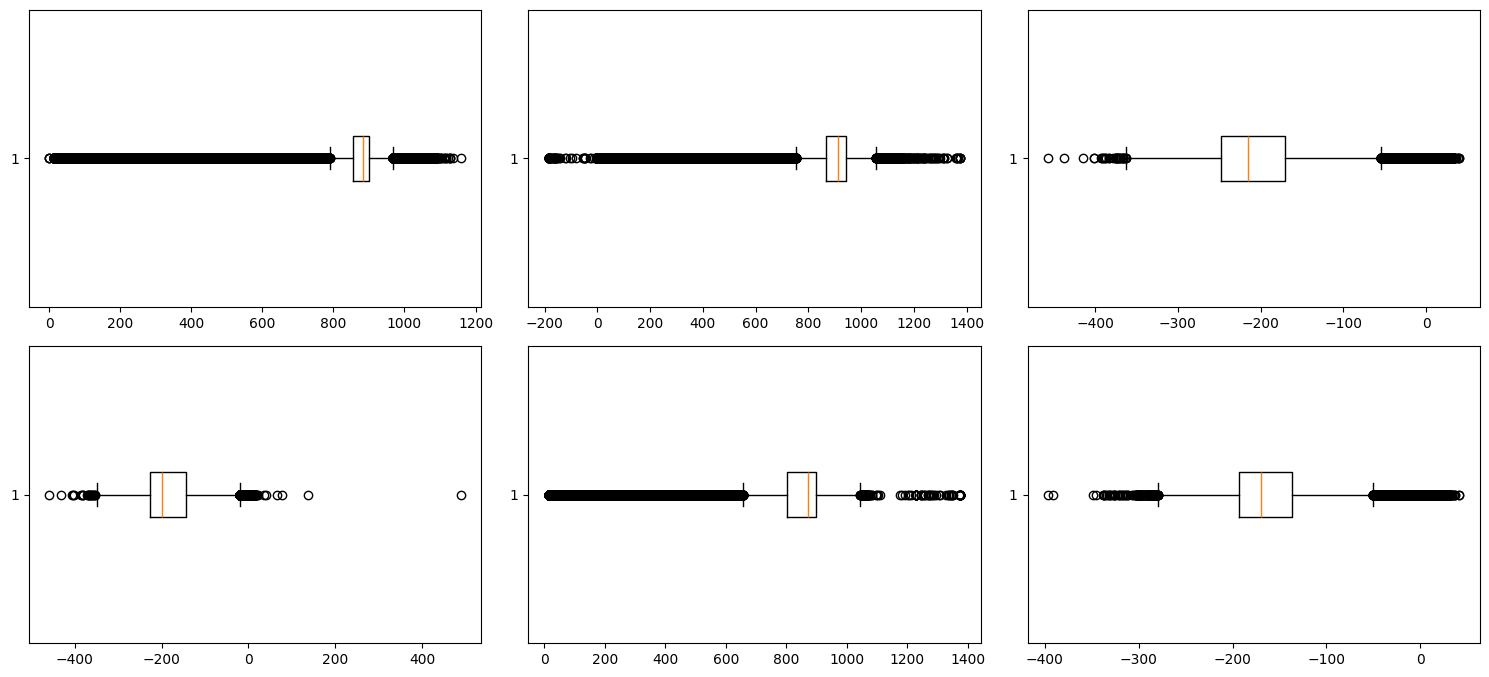

In [21]:
plt.figure(figsize=(15, 10))
for i in range(len(cols)):
    box_plot(cols[i])  

plt.tight_layout() 
plt.show()  

# Anomaly Detection

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [23]:
# Standard Scaler

X = df.drop('time',axis =1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
X_scaled

array([[ 0.42674289,  0.45477807, -0.11811011, -0.2381599 ,  0.41907414,
        -0.05914461],
       [ 0.46204055,  0.47677727, -0.0655574 , -0.19442891,  0.45104306,
        -0.10888089],
       [ 0.45120782,  0.49398908, -0.03459064, -0.02094783,  0.46189405,
        -0.04767692],
       ...,
       [ 0.48629249,  0.41283141, -0.52733533, -0.55570907,  0.52109802,
        -0.48795898],
       [ 0.55110631,  0.47161943, -0.54145698, -0.59389045,  0.58528177,
        -0.52377941],
       [ 0.46700048,  0.44021643, -0.57686197, -0.60887442,  0.51119995,
        -0.5503226 ]], shape=(376124, 6))

In [25]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame({'column-1': components[:, 0], 'column-2': components[:, 1]})
pca_df.head()

,column-1,column-2
0,0.699684,0.366076
1,0.717177,0.419964
2,0.615755,0.533587
3,0.631301,0.516151
4,0.671945,0.567009


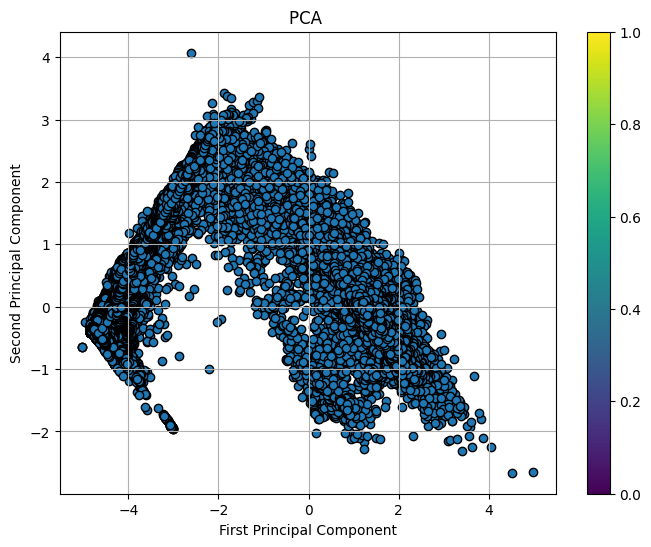

In [26]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['column-1'], pca_df['column-2'], cmap='coolwarm', edgecolor='k')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA ')
plt.colorbar(scatter)
plt.grid()
plt.show()

# Isolation Forest

In [27]:
from sklearn.ensemble import IsolationForest

outliers_fraction = 0.05
model = IsolationForest(contamination=outliers_fraction,n_jobs=-1,random_state=42)
model.fit(pca_df[['column-1','column-2']])

pca_df['anomaly_if'] = model.predict(pca_df[['column-1','column-2']])


In [28]:
pca_df['anomaly_if'].value_counts()

anomaly_if
 1    357317
-1     18807
Name: count, dtype: int64

In [29]:
pca_df['original_index']=df.index

In [30]:
pca_df

,column-1,column-2,anomaly_if,original_index
0,0.699684,0.366076,1,0
1,0.717177,0.419964,1,1
2,0.615755,0.533587,1,2
3,0.631301,0.516151,1,3
4,0.671945,0.567009,1,4
...,...,...,...,...
376119,1.215923,0.070219,1,377714
376120,1.166896,-0.044642,1,377715
376121,1.221505,-0.061693,1,377716
376122,1.334090,-0.020908,1,377717


# merge the Anomaly Prediction Back into original dataframe using index

In [31]:
df = pd.merge(df,pca_df[['original_index','anomaly_if']],left_index=True, right_on='original_index', how='left')
df = df.drop('original_index', axis=1)
df.head()
     

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,anomaly_if
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90,1
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76,1
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01,1
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82,1
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39,1


In [32]:
df.reset_index(drop=True, inplace=True)

In [33]:
df

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,anomaly_if
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90,1
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76,1
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01,1
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82,1
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39,1
...,...,...,...,...,...,...,...,...
376119,2020-08-07 11:55:00,899.42,919.79,-224.07,-209.77,901.01,-175.15,1
376120,2020-08-07 12:00:00,879.90,895.02,-228.04,-211.28,878.08,-176.94,1
376121,2020-08-07 12:05:00,887.20,895.70,-230.11,-214.65,885.32,-179.18,1
376122,2020-08-07 12:10:00,908.50,916.33,-231.51,-218.09,906.20,-181.96,1


In [34]:
df['anomaly_if'].value_counts()

anomaly_if
 1    357317
-1     18807
Name: count, dtype: int64

In [35]:
df['time'] = pd.to_datetime(df['time'])
df['Year'] = df['time'].dt.year
df['Month'] = df['time'].dt.month

In [36]:
# Group by year and count the number of anomalies
anomaly_counts = df.groupby(['Year', 'Month'])['anomaly_if'].apply(lambda x: (x == -1).sum()).reset_index(name='Anomaly_Count')

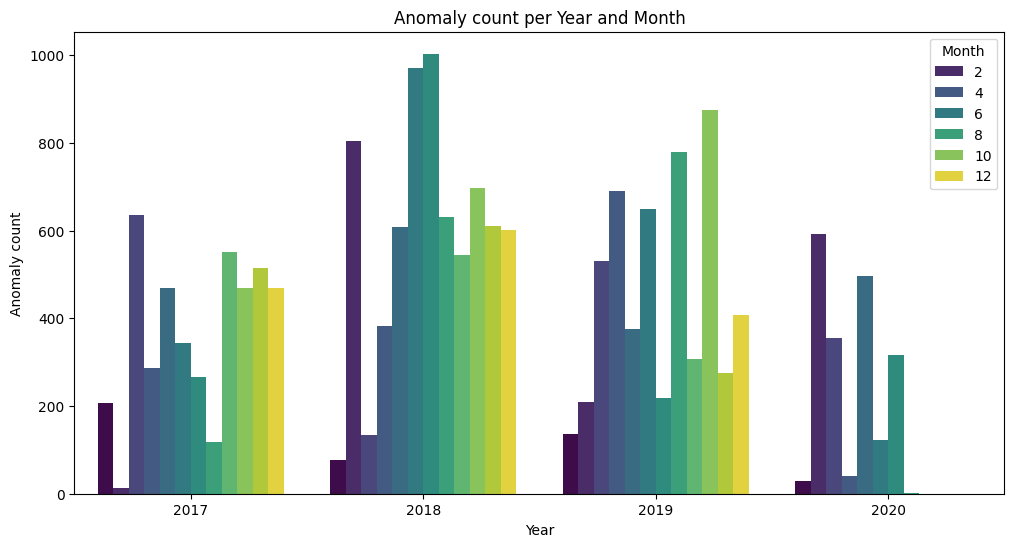

In [37]:
# plot the bar graph using seaborn

plt.figure(figsize=(12,6))
sns.barplot(x='Year',y='Anomaly_Count', hue='Month',data=anomaly_counts,palette='viridis')
plt.title('Anomaly count per Year and Month')
plt.xlabel('Year')
plt.ylabel('Anomaly count')
plt.show()